# Импортируем библеотеки 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from PIL import Image

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

# Импортируем базу данных

In [2]:
root_dir = 'C:/Users/holmi/OneDrive/Desktop/American Sign Language Digits Dataset'

image_data = []

for label in range(10):
    
#     Создается ссылка на базу данных
    label_dir = os.path.join(root_dir, str(label), 'Input Images - Sign {}'.format(label))
    print(label_dir)
    
#     Добавляем фотографии image_data
    for image_file in os.listdir(label_dir):
        image = Image.open(os.path.join(label_dir, image_file))
        image_data.append({
            'label': label,
            'color_image': image
        })

df = pd.DataFrame(image_data)

C:/Users/holmi/OneDrive/Desktop/American Sign Language Digits Dataset\0\Input Images - Sign 0
C:/Users/holmi/OneDrive/Desktop/American Sign Language Digits Dataset\1\Input Images - Sign 1
C:/Users/holmi/OneDrive/Desktop/American Sign Language Digits Dataset\2\Input Images - Sign 2
C:/Users/holmi/OneDrive/Desktop/American Sign Language Digits Dataset\3\Input Images - Sign 3
C:/Users/holmi/OneDrive/Desktop/American Sign Language Digits Dataset\4\Input Images - Sign 4
C:/Users/holmi/OneDrive/Desktop/American Sign Language Digits Dataset\5\Input Images - Sign 5
C:/Users/holmi/OneDrive/Desktop/American Sign Language Digits Dataset\6\Input Images - Sign 6
C:/Users/holmi/OneDrive/Desktop/American Sign Language Digits Dataset\7\Input Images - Sign 7
C:/Users/holmi/OneDrive/Desktop/American Sign Language Digits Dataset\8\Input Images - Sign 8
C:/Users/holmi/OneDrive/Desktop/American Sign Language Digits Dataset\9\Input Images - Sign 9


Делаем копию для професссиональности

In [3]:
dataset = df.copy()

In [4]:
dataset

,label,color_image
0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
3,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
...,...,...
4995,9,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4996,9,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4997,9,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4998,9,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   label        5000 non-null   int64 
 1   color_image  5000 non-null   object
dtypes: int64(1), object(1)
memory usage: 78.3+ KB


# Визуализация наших классов (0-9)

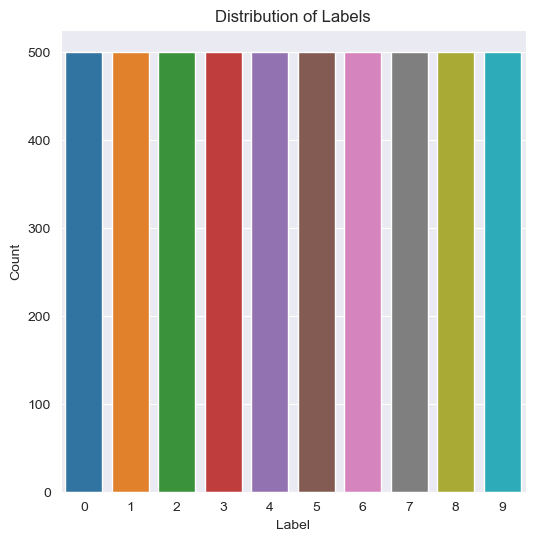

In [6]:
plt.figure(figsize=(6, 6))
sns.set_style("darkgrid")
sns.countplot(data=dataset,x='label')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

plt.show()

Пример самих фотографий 

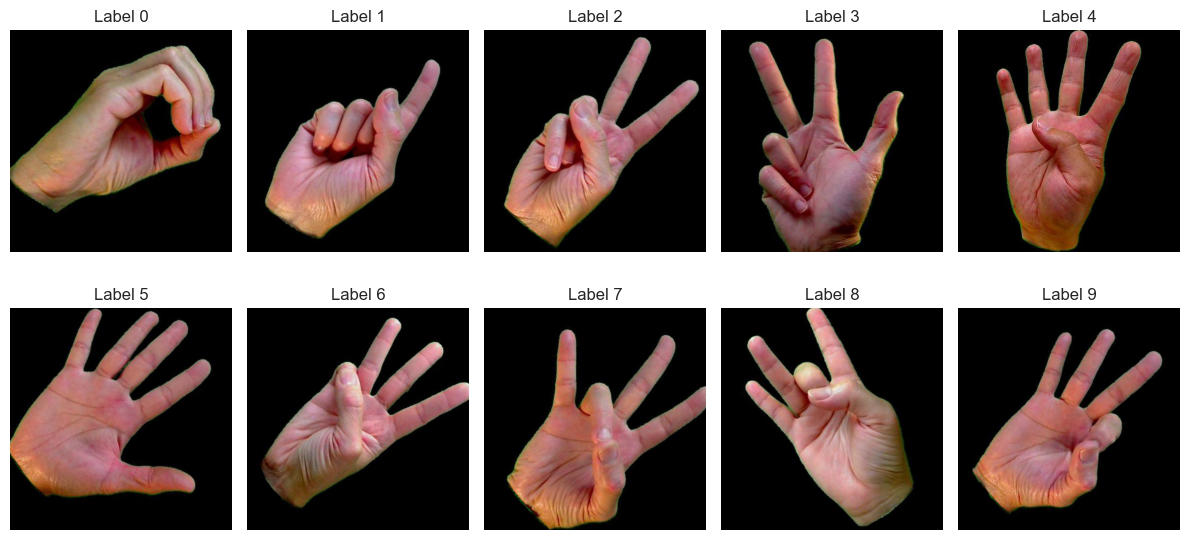

In [7]:
fig, axs = plt.subplots(2, 5, figsize=(12, 6))

for i, (label, image) in enumerate(dataset.groupby('label').first().reset_index()[['label', 'color_image']].itertuples(index=False)):
    ax = axs[i // 5, i % 5]
    ax.imshow(image)
    ax.set_title('Label {}'.format(label))
    ax.axis('off')

plt.axis('off')
plt.tight_layout()
plt.show()

# Масштабирование данных

Для для сверточной нейронной сети дынные в виде фотографий должны иметь одинаковый пиксельный размер

In [8]:
resized_images = []
for image in df['color_image'].tolist():
    resized_image = image.resize((32, 32))  # Resize 
    resized_images.append(np.array(resized_image))
images = np.array(resized_images)

In [9]:
labels = np.array(df['label'])

Теперь у нас есть данные в виде фотографий и их значений

# Нормализация данных

Привести формат значений векторов к значениям от 0 до 1

In [10]:
images = images / 255

In [11]:
images

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

Разбияние готовых данных на обучающие и тестовые

In [12]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [13]:
X_train[0][0] # этот вектор означает число 8

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.24705882, 0.21960784, 0.21176471],
       [0.63529412, 0.50196078, 0.51764706],
       [0.20392157, 0.17254902, 0.16862745],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.

Теперь конвертируем значения векторов от 0 до 1

In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Пример значений в labels

In [15]:
y_train[0] # этот вектор означает число 8

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [16]:
X_train.shape

(4000, 32, 32, 3)

In [17]:
model = Sequential()

Добавляем слои в нашу сверточную нейронную сеть

In [18]:
model.add(Conv2D(75, (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(50, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(25, (3, 3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 75)        2100      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 75)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 16, 16, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 50)       

# Процесс обучения нейронной сети

Наши гиперпараметры

In [19]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,
    
        zca_whitening=False,
        rotation_range=10, 
        zoom_range = 0.1, 
    
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip=False, 
        vertical_flip=False) 

In [20]:
datagen.fit(X_train)

Колбэк ReduceLROnPlateau

In [21]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.0001)

Само обучение

In [22]:
history = model.fit(datagen.flow(X_train, y_train), epochs=30, validation_data=(X_test, y_test), callbacks=[learning_rate_reduction])

Epoch 1/30


125/125 [==============================] - 17s 108ms/step - loss: 1.4878 - accuracy: 0.5015 - val_loss: 2.2378 - val_accuracy: 0.1670 - lr: 0.0100
Epoch 2/30
125/125 [==============================] - 11s 87ms/step - loss: 0.6919 - accuracy: 0.7742 - val_loss: 1.9669 - val_accuracy: 0.2430 - lr: 0.0100
Epoch 3/30
125/125 [==============================] - 11s 90ms/step - loss: 0.4518 - accuracy: 0.8505 - val_loss: 1.4975 - val_accuracy: 0.3320 - lr: 0.0100
Epoch 4/30
125/125 [==============================] - 12s 93ms/step - loss: 0.3266 - accuracy: 0.8965 - val_loss: 0.5170 - val_accuracy: 0.8730 - lr: 0.0100
Epoch 5/30
125/125 [==============================] - 12s 94ms/step - loss: 0.2475 - accuracy: 0.9240 - val_loss: 0.2213 - val_accuracy: 0.9600 - lr: 0.0100
Epoch 6/30
125/125 [==============================] - 12s 91ms/step - loss: 0.1894 - accuracy: 0.9423 - val_loss: 0.1022 - val_accuracy: 0.9800 - lr: 0.0100
Epoch 7/30
125/125 [==============================] - 1

125/125 [==============================] - 11s 86ms/step - loss: 0.0497 - accuracy: 0.9845 - val_loss: 0.0209 - val_accuracy: 0.9930 - lr: 0.0100
Epoch 21/30
125/125 [==============================] - 11s 88ms/step - loss: 0.0479 - accuracy: 0.9875 - val_loss: 0.0103 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 22/30
125/125 [==============================] - 11s 83ms/step - loss: 0.0420 - accuracy: 0.9887 - val_loss: 0.0139 - val_accuracy: 0.9980 - lr: 0.0100
Epoch 23/30
125/125 [==============================] - 11s 89ms/step - loss: 0.0434 - accuracy: 0.9880 - val_loss: 0.0132 - val_accuracy: 0.9990 - lr: 0.0100
Epoch 24/30
 53/125 [===========>..................] - ETA: 6s - loss: 0.0315 - accuracy: 0.9912

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



График изменений наших метрик точности(accuracy) и ошибок(loss)

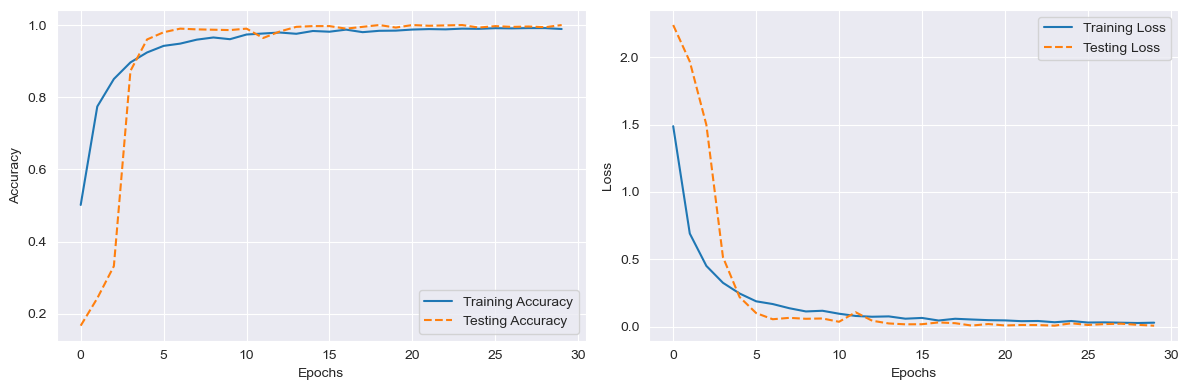

In [23]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

plot_labels = ['Accuracy', 'Loss']
plot_styles = ['-', '--']

for i, metric in enumerate(['accuracy', 'loss']):
    train_metric = history.history[metric]
    test_metric = history.history['val_' + metric]
    axs[i].plot(train_metric, label='Training ' + metric.capitalize(), linestyle=plot_styles[0])
    axs[i].plot(test_metric, label='Testing ' + metric.capitalize(), linestyle=plot_styles[1])
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel(plot_labels[i])
    axs[i].legend()

plt.tight_layout()
plt.show()

Даем тестовые данные

In [24]:
y_pred = model.predict(X_test)

32/32 [==============================] - 1s 30ms/step


In [25]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

In [26]:
y_pred_classes

array([3, 5, 5, 2, 1, 0, 1, 4, 4, 3, 4, 0, 1, 1, 6, 7, 2, 6, 3, 2, 1, 6,
       2, 1, 9, 1, 8, 0, 9, 0, 3, 0, 9, 9, 3, 5, 7, 8, 9, 4, 7, 8, 0, 0,
       1, 7, 7, 9, 6, 5, 9, 9, 4, 5, 2, 6, 2, 0, 3, 5, 4, 8, 8, 7, 0, 5,
       6, 4, 7, 9, 3, 0, 0, 0, 2, 4, 1, 5, 5, 7, 6, 6, 8, 3, 6, 2, 1, 1,
       9, 7, 8, 0, 0, 2, 0, 9, 5, 6, 0, 0, 3, 3, 4, 8, 0, 0, 1, 2, 9, 2,
       2, 2, 8, 1, 4, 7, 4, 4, 0, 4, 2, 2, 9, 0, 4, 9, 4, 9, 5, 6, 8, 6,
       3, 2, 7, 8, 8, 7, 1, 0, 7, 7, 9, 7, 8, 6, 5, 7, 5, 5, 2, 7, 9, 9,
       3, 0, 5, 5, 7, 0, 4, 6, 1, 2, 0, 7, 2, 3, 6, 4, 6, 3, 5, 6, 0, 6,
       8, 6, 0, 3, 9, 5, 3, 0, 5, 7, 7, 7, 1, 3, 1, 7, 7, 9, 4, 2, 1, 5,
       7, 8, 7, 1, 5, 8, 6, 4, 4, 6, 7, 1, 6, 1, 7, 4, 8, 4, 9, 0, 7, 2,
       3, 1, 9, 6, 3, 6, 5, 5, 0, 4, 1, 7, 2, 9, 0, 6, 6, 1, 5, 9, 1, 1,
       8, 8, 2, 3, 4, 2, 3, 9, 9, 8, 3, 2, 4, 1, 7, 4, 0, 1, 3, 4, 4, 8,
       2, 3, 4, 5, 5, 0, 1, 2, 9, 0, 3, 6, 2, 5, 7, 2, 9, 9, 1, 2, 3, 7,
       2, 6, 3, 1, 0, 5, 4, 4, 6, 1, 4, 4, 8, 2, 0,

# confusion matrix

In [27]:
y_true_classes ==  y_pred_classes

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [28]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
cm

array([[111,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 105,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 105,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  85,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  94,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  98,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  98,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 112,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  81,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 111]], dtype=int64)

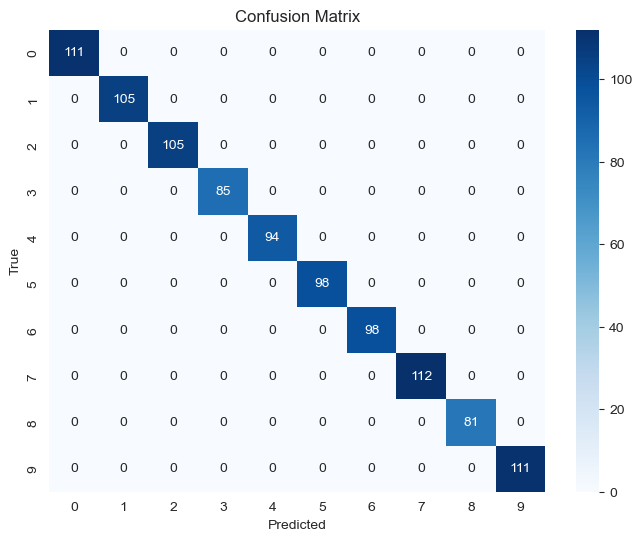

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [30]:
accuracy = model.evaluate(X_test, y_test)
print(f'results - Loss: {accuracy[0]} - Accuracy: {accuracy[1]*100}%')

32/32 [==============================] - 1s 30ms/step - loss: 0.0086 - accuracy: 1.0000
results - Loss: 0.008587601594626904 - Accuracy: 100.0%


Очень хорошая точность была сделана все волишь одна ошибка в тестовых данных(9 распознали как 5)

In [31]:
# model.save('model_cnn.h5')

In [32]:
# Проверка 

In [33]:
label_dir = 'C:/Users/holmi/OneDrive/Desktop/imag'

image_data = []

#     Добавляем фотографии image_data
for image_file in os.listdir(label_dir):
    image = Image.open(os.path.join(label_dir, image_file))
    image_data.append({
        'label': 10,
        'color_image': image
        })


In [34]:
df2 = pd.DataFrame(image_data)
df2

,label,color_image
0,10,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,10,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,10,<PIL.JpegImagePlugin.JpegImageFile image mode=...
3,10,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,10,<PIL.JpegImagePlugin.JpegImageFile image mode=...
5,10,<PIL.JpegImagePlugin.JpegImageFile image mode=...
6,10,<PIL.JpegImagePlugin.JpegImageFile image mode=...
7,10,<PIL.JpegImagePlugin.JpegImageFile image mode=...


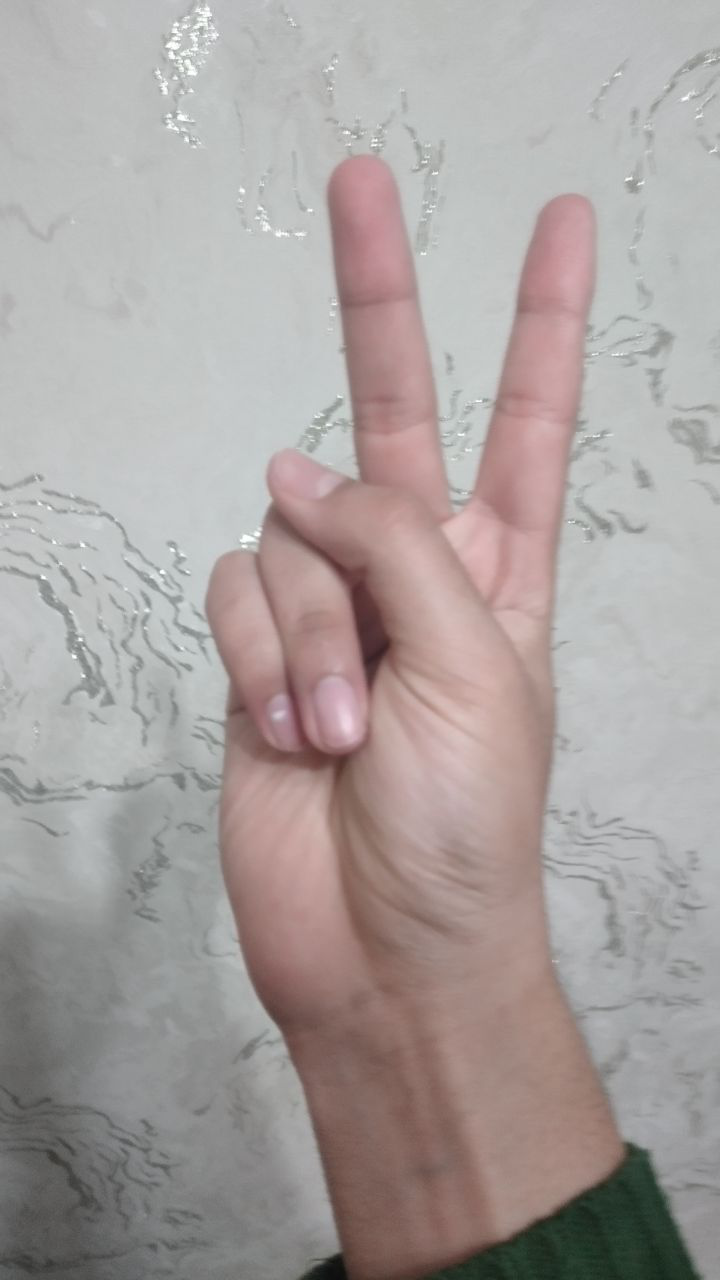

In [35]:
image_data[0]['color_image']

In [36]:
resized_images = []
for image in df2['color_image'].tolist():
    resized_image = image.resize((32, 32))  # Resize 
    resized_images.append(np.array(resized_image))
images = np.array(resized_images)

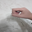

In [37]:
resized_image

In [38]:
images = images / 255

In [39]:
y_pred2 = model.predict(images)

1/1 [==============================] - 0s 63ms/step


In [40]:
y_pred2

array([[9.99996424e-01, 3.06281015e-13, 2.95189936e-12, 2.63140332e-09,
        1.29755040e-06, 4.92036804e-07, 1.25554391e-06, 4.28443635e-11,
        4.27512387e-10, 4.32877613e-07],
       [9.99578655e-01, 1.50656501e-11, 6.90669674e-11, 1.20024993e-07,
        1.17007767e-04, 1.70527055e-04, 3.23931235e-05, 9.66425429e-09,
        2.21005276e-08, 1.01293554e-04],
       [9.99985576e-01, 4.56009579e-13, 6.35182120e-13, 3.17146476e-10,
        3.42380702e-07, 2.14096940e-06, 1.15964785e-05, 2.01230962e-10,
        5.38844580e-10, 3.33097290e-07],
       [9.99916196e-01, 9.00700901e-13, 1.61165681e-11, 7.13084489e-08,
        2.60553279e-05, 1.97079080e-05, 5.85348607e-06, 1.67065750e-09,
        8.27437785e-10, 3.20336621e-05],
       [9.99986053e-01, 7.46044719e-13, 5.85483745e-12, 2.40052467e-09,
        4.28988051e-06, 7.20668936e-07, 7.91132788e-06, 1.32593755e-10,
        9.76243197e-10, 1.04395519e-06],
       [9.99923706e-01, 2.22404040e-12, 3.92975964e-11, 6.26238750e-09,
   